In [1]:
import requests
import pandas as pd
import numpy as np
from time import sleep
import random
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import re
import seaborn as sns
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
HEADERS ={

'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'

}
url = 'https://www.autotrader.ca/cars/bc/kelowna/?rcp=15&rcs=0&srt=35&prx=25&prv=British%20Columbia&loc=Kelowna%2C%20BC&hprc=True&wcp=True&inMarket=advancedSearch'

In [3]:
r = requests.get(url,   headers = HEADERS)
sleep(random.uniform(10, 20)) 
print(r)

<Response [200]>


In [4]:
soup = BeautifulSoup(r.content, 'lxml')

In [7]:
mileage = []
unwanted_strings = ["km", "lowna", "le",'e','m']
for i in soup.find_all('div', class_= "top-detail-area"):
    name = i.get_text(strip= True)[-11:]
    for unwanted in unwanted_strings:
        name = name.replace(unwanted, "")
    mileage.append(name)

# Data Extraction

In [9]:
car_name = []
pri = []
kilometer = []
for i in range(0,250,15):
    url = f"https://www.autotrader.ca/cars/bc/kelowna/?rcp=100&rcs={i}&srt=35&prx=25&prv=British%20Columbia&loc=Kelowna%2C%20BC&hprc=True&wcp=True&hhd=True&inMarket=advancedSearch"
    r = requests.get(url,   headers = HEADERS)
    sleep(random.uniform(10, 20))
    soup = BeautifulSoup(r.content, 'lxml')
    for i in soup.find_all("span", class_= "title-with-trim"):
        name = i.get_text(strip= True)
        car_name.append(name)
    for i in soup.find_all('div', class_='price-delta'):
        name = i.get_text(strip=True)
        pri.append(name)
    for i in soup.find_all('div', class_= "top-detail-area"):
        name = i.get_text(strip=True)
        kilometer.append(name)

In [41]:
df = pd.DataFrame({"Car_Name":car_name,"Mileage":kilometer,"Dealer_price":pri})

# Data Cleaning 

In [42]:
# extract the odometer reading from the mileage column
df['Odometer_reading'] = [x[-10:] for x in df["Mileage"]]

In [43]:
df

,Car_Name,Mileage,Dealer_price,Odometer_reading
0,2020 Hyundai Tucson Preferred | AWD | Heated S...,"Kelowna∙ 5 km85,254 km","$25,799$381 Below Market","m85,254 km"
1,2025 BMW 8 Series M850i xDrive,Kelowna∙ 4 km,"$137,100Dealer Price$137,100 MSRP",owna∙ 4 km
2,2024 Chevrolet Corvette Z06,Kelowna∙ 4 km,"$173,424Dealer Price$173,424 MSRP",owna∙ 4 km
3,2024 BMW X2 M35i,Kelowna∙ 4 km,"$75,100Dealer Price$75,100 MSRP",owna∙ 4 km
4,2025 BMW X1 xDrive28i,Kelowna∙ 4 km,"$62,600Dealer Price$62,100 MSRP",owna∙ 4 km
...,...,...,...,...
2035,"2023 GMC Sierra 1500 Pro 4x4, Heated Seats, En...","Coquitlam∙ 250 km + Delivery available20,532 km","$47,998$8,312 Below Market","e20,532 km"
2036,2024 Ram 1500 Sport 4x4 Crew Cab 5'7 Box,Kelowna∙ 5 km,"$68,990Dealer Price$81,814 MSRP",owna∙ 5 km
2037,2024 Mitsubishi RVR - RATES FROM 0.9% - CERTIF...,"Kelowna∙ 5 km + Delivery available5,105 km","$31,000$32,000Save $1,000$4,589 Below Market","le5,105 km"
2038,2017 Chevrolet Equinox Premier True North V6 AWD,"Kelowna∙ 4 km154,530 km","$16,855$2,651 Below Market","154,530 km"


In [44]:
# now we donot need the mileage column, so dropped the column
df.drop("Mileage", axis=1, inplace = True)

In [45]:
# split the Dealer price column to extract the market price and dealer price of the car. 
df[['col1', 'col2', 'col3', 'col4','col5']] = df['Dealer_price'].str.split("$", expand=True)

In [46]:
df.drop(['col1','col5', "Dealer_price"], axis=1, inplace = True)

In [47]:
# rename the column name
df.rename(columns= {"col2":"Dealer_Price", "col4":"Discount", "col3":"Marrket Price"}, inplace = True)

In [49]:
#df['Dealer_Price2'] = df['Dealer_Price2'].str.replace('Dealer Price','').str.replace(",",'').str.replace(" ","")

In [50]:
# we donot need the market price as most of the value in the market price has missing value also there is not much analysis we can do with that
df.drop(["Marrket Price","Discount"], axis=1, inplace = True)

In [59]:
# replace all the unwanted charachter from the odometer reading column
df['Odometer_reading'] =df['Odometer_reading'].str.replace("km",'').str.replace(',','').str.replace('wna∙ ','').str.replace(' ','').str.replace('m','').str.replace("o",'').str.replace("e","").str.replace("l","").str.replace("le","")

In [52]:
# function to extract the year of manufacturing from the car name
def year(x):
    return(x[:x.index(" ")])

In [53]:
df['Year'] = df['Car_Name'].apply(year)

In [54]:
# Extract the brand name from the car_name using the split
df["Brand"] = df['Car_Name'].str.split(" ").str[1]

In [61]:
df

,Car_Name,Odometer_reading,Dealer_Price,Year,Brand
0,2020 Hyundai Tucson Preferred | AWD | Heated S...,85254,"25,799",2020,Hyundai
1,2025 BMW 8 Series M850i xDrive,4,"137,100Dealer Price",2025,BMW
2,2024 Chevrolet Corvette Z06,4,"173,424Dealer Price",2024,Chevrolet
3,2024 BMW X2 M35i,4,"75,100Dealer Price",2024,BMW
4,2025 BMW X1 xDrive28i,4,"62,600Dealer Price",2025,BMW
...,...,...,...,...,...
2035,"2023 GMC Sierra 1500 Pro 4x4, Heated Seats, En...",20532,"47,998",2023,GMC
2036,2024 Ram 1500 Sport 4x4 Crew Cab 5'7 Box,5,"68,990Dealer Price",2024,Ram
2037,2024 Mitsubishi RVR - RATES FROM 0.9% - CERTIF...,5105,"31,000",2024,Mitsubishi
2038,2017 Chevrolet Equinox Premier True North V6 AWD,154530,"16,855",2017,Chevrolet


In [62]:
df["Kilometer"] = kilometer

In [63]:
df["Kilometer"] = df["Kilometer"].str.replace("North ","").str.replace("Port ", "")

In [64]:
df['Location'] = df['Kilometer'].apply(year)

In [65]:
df.drop("Kilometer", axis =1, inplace = True)

In [76]:
name_split = df['Car_Name'].str.split(" ")
m = []
for i in name_split:
    if len(i) > 4:
        model = str(i[2])+ ' ' +str(i[3])
        m.append(model)
    else:
        model = str(i[1])+ ' ' +str(i[2])
        m.append(model)

In [80]:
df['Model'] = m

In [77]:
df["Odometer_reading"] = df["Odometer_reading"].str.replace("owna∙ ","").str.replace("m","").str.replace("e","").str.replace(",","").str.replace(" km","").str.replace(" k","").str.replace("k","").str.replace("ck∙ ","").str.replace("nd∙ ","").str.replace("l","").str.replace("ab","").str.replace("c∙ ","")

In [81]:
df

,Car_Name,Odometer_reading,Dealer_Price,Year,Brand,Location,Model
0,2020 Hyundai Tucson Preferred | AWD | Heated S...,85254,"25,799",2020,Hyundai,Kelowna∙,Tucson Preferred
1,2025 BMW 8 Series M850i xDrive,4,"137,100Dealer Price",2025,BMW,Kelowna∙,8 Series
2,2024 Chevrolet Corvette Z06,4,"173,424Dealer Price",2024,Chevrolet,Kelowna∙,Chevrolet Corvette
3,2024 BMW X2 M35i,4,"75,100Dealer Price",2024,BMW,Kelowna∙,BMW X2
4,2025 BMW X1 xDrive28i,4,"62,600Dealer Price",2025,BMW,Kelowna∙,BMW X1
...,...,...,...,...,...,...,...
2035,"2023 GMC Sierra 1500 Pro 4x4, Heated Seats, En...",20532,"47,998",2023,GMC,Coquitlam∙,Sierra 1500
2036,2024 Ram 1500 Sport 4x4 Crew Cab 5'7 Box,5,"68,990Dealer Price",2024,Ram,Kelowna∙,1500 Sport
2037,2024 Mitsubishi RVR - RATES FROM 0.9% - CERTIF...,5105,"31,000",2024,Mitsubishi,Kelowna∙,RVR -
2038,2017 Chevrolet Equinox Premier True North V6 AWD,154530,"16,855",2017,Chevrolet,Kelowna∙,Equinox Premier


In [82]:
df["Model"] = df["Model"].str.replace(" -","").str.replace(" *Low","").str.replace(" Low","").str.replace(" Preferred","").str.replace(" Hatchback",'').str.replace(" 5-door","")

C:\Users\Dinesh_Saini\AppData\Local\Temp\ipykernel_23764\406255489.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Model"] = df["Model"].str.replace(" -","").str.replace(" *Low","").str.replace(" Low","").str.replace(" Preferred","").str.replace(" Hatchback",'').str.replace(" 5-door","")


In [83]:
df["Odometer_reading"] = df["Odometer_reading"].str.replace("d∙","").str.replace("e","").str.replace("bl","").str.replace("k∙","")

In [92]:
df["Dealer_Price"] = df["Dealer_Price"].str.replace("Dealer Price","").str.replace(",","")

In [107]:
df["Year"] = df["Year"].replace("2025","2024")

In [95]:
# changing the datatype of the column for analysis
df["Dealer_Price"] = df["Dealer_Price"].astype("int64")
df["Odometer_reading"] = df["Odometer_reading"].astype("int64")

In [109]:
df["Year"] = pd.to_datetime(df["Year"])
df["Year"]=df["Year"].dt.year

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Car_Name          2040 non-null   object
 1   Odometer_reading  2040 non-null   int64 
 2   Dealer_Price      2040 non-null   int64 
 3   Year              2040 non-null   int64 
 4   Brand             2040 non-null   object
 5   Location          2040 non-null   object
 6   Model             2040 non-null   object
dtypes: int64(3), object(4)
memory usage: 111.7+ KB


In [111]:
# Since 4 or 5 are the location distance not the actual odometer reading so instead of 4 or 5 changed it to 0.
df.Odometer_reading.replace([4,5], [0, 0], inplace=True)

In [113]:
df['Location']= df['Location'].str.replace("∙","")

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Car_Name          2040 non-null   object
 1   Odometer_reading  2040 non-null   int64 
 2   Dealer_Price      2040 non-null   int64 
 3   Year              2040 non-null   int64 
 4   Brand             2040 non-null   object
 5   Location          2040 non-null   object
 6   Model             2040 non-null   object
dtypes: int64(3), object(4)
memory usage: 111.7+ KB


In [115]:
df["Year"] = df["Year"].replace("2025","2024")

# EDA

In [116]:
df.groupby("Year")['Model'].count()

Year
2001      2
2002      2
2005      1
2006      1
2007      3
2010     10
2011      8
2012     10
2013     20
2014      9
2015     34
2016     82
2017    173
2018    195
2019    105
2020    154
2021    296
2022    333
2023    361
2024    241
Name: Model, dtype: int64

In [117]:
total_brand = df['Brand'].value_counts().reset_index()[0:11]
total_brand = total_brand.rename(columns={"index":"Car Brand","Brand":"Number"})
print(total_brand)

        Car Brand  Number
0            Jeep     240
1             Ram     240
2       Chevrolet     204
3            Ford     191
4             BMW     130
5             GMC     107
6         Hyundai     103
7             Kia      93
8          Toyota      89
9           Dodge      73
10  Mercedes-Benz      61


<function matplotlib.pyplot.show(close=None, block=None)>

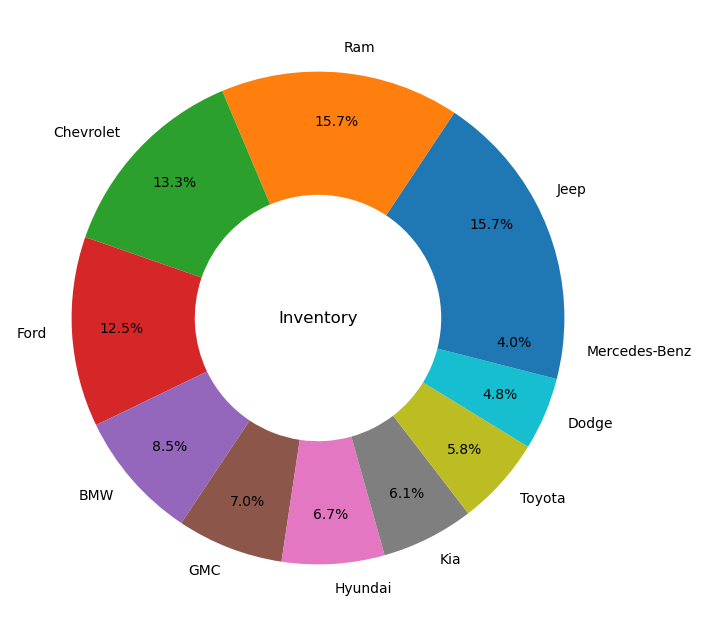

In [118]:
plt.pie(total_brand['Number'], labels= total_brand["Car Brand"],pctdistance = 0.80, autopct='%1.1f%%', startangle=0,
       wedgeprops={'width': 0.5})

# Adding the title in the center
plt.text(0, 0, "Inventory", ha='center', va='center', fontsize=12)
plt.show

Observation : Highest Inventory for manufacturers who make Trucks.

In the economy-class vehicles category, the Hyundai is on top

In [143]:
location_distribution = df['Location'].value_counts()[:8].reset_index().sort_values(by="Location", ascending= False)
location_distribution = location_distribution.rename(columns={"index":"City","Location":"Total Number"})

<BarContainer object of 8 artists>

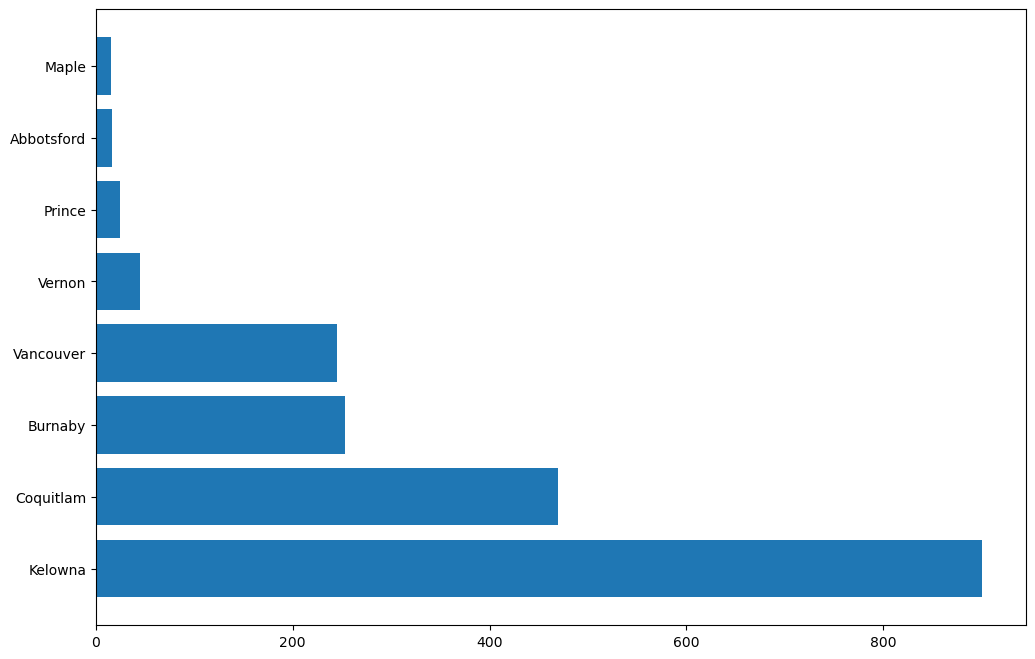

In [144]:
plt.barh(location_distribution['City'], location_distribution['Total Number'])

Observation: Kelowna has the most significant number of used vehicle options to choose from followed by Coquitlam and Burnaby.


In [ ]:
year with price
odometer with price

In [121]:
year = df.groupby("Year")['Model'].count().reset_index()[8:].sort_values(by="Year", ascending =False)
year

,Year,Model
19,2024,241
18,2023,361
17,2022,333
16,2021,296
15,2020,154
14,2019,105
13,2018,195
12,2017,173
11,2016,82
10,2015,34


In [123]:
price_by_brand = df.groupby("Brand")["Dealer_Price"].sum().reset_index()

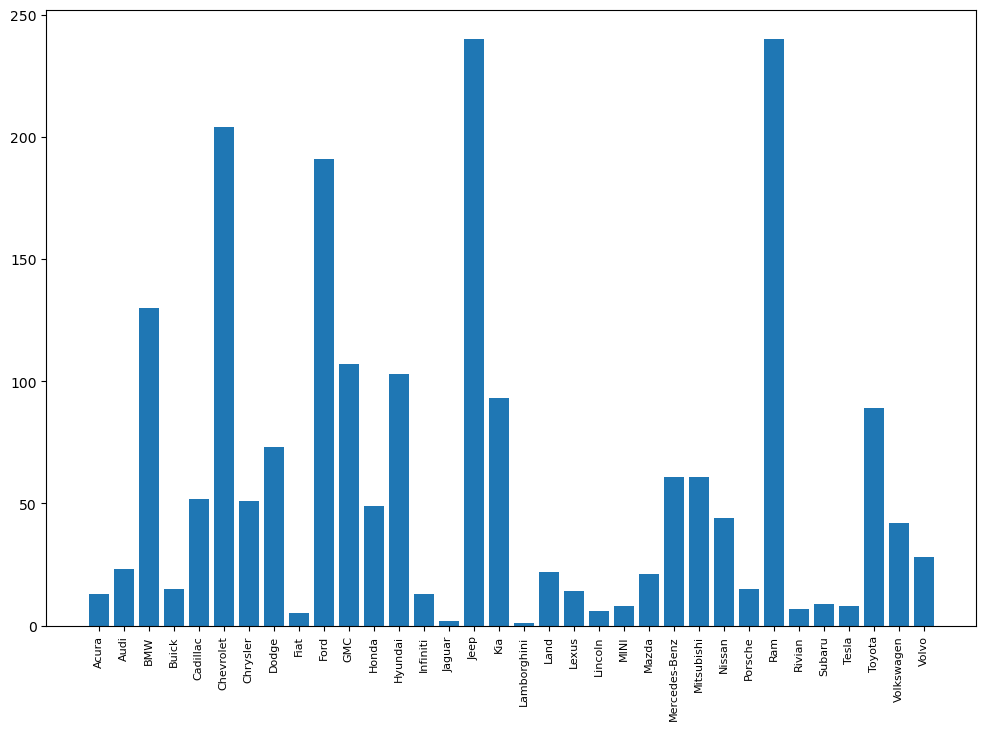

In [124]:
brand_group = df.groupby("Brand")
Year_group = brand_group.count()['Year']

brand = [brand for brand, df in brand_group]
plt.bar(brand, Year_group)
plt.xticks(brand, rotation ="vertical", size = 8)
plt.show()

C:\Users\Dinesh_Saini\AppData\Local\Temp\ipykernel_23764\2290827765.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  price = round(df.groupby("Brand").mean()["Dealer_Price"],2)
C:\Users\Dinesh_Saini\AppData\Local\Temp\ipykernel_23764\2290827765.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(brand, rotation ="vertical", size = 8)


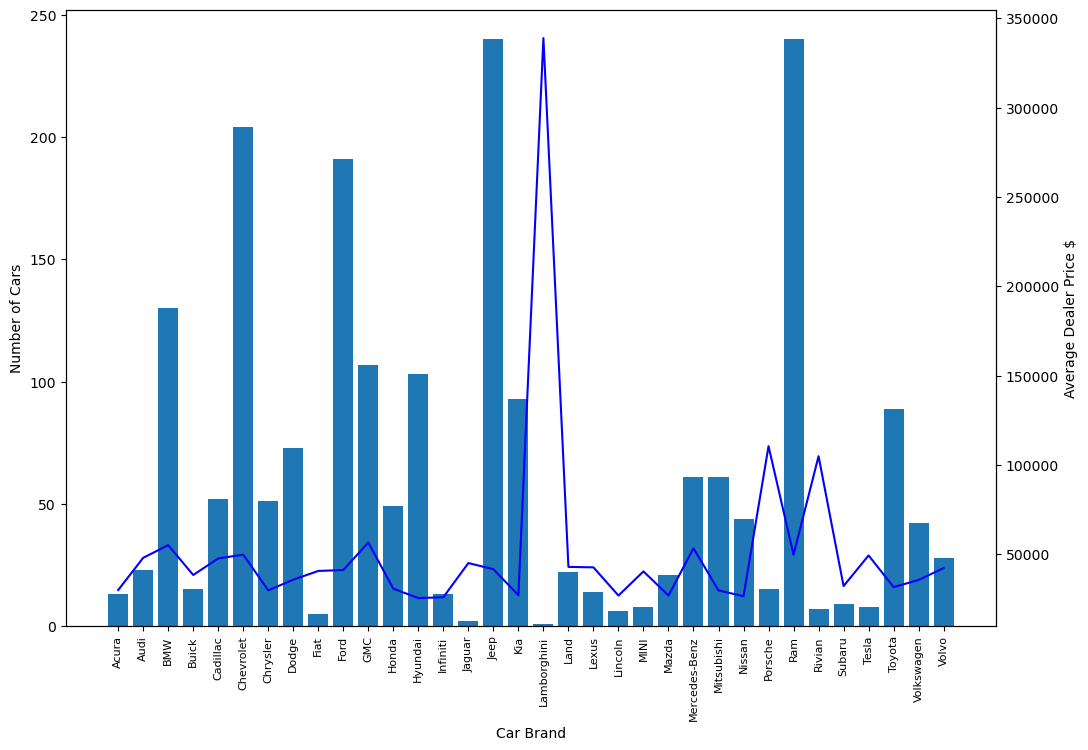

In [148]:
price = round(df.groupby("Brand").mean()["Dealer_Price"],2)
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(brand, Year_group)
ax1.set_xlabel("Car Brand")
ax1.set_ylabel("Number of Cars")
ax2.plot(brand, price, "b-")
ax2.set_ylabel("Average Dealer Price $")
ax1.set_xticklabels(brand, rotation ="vertical", size = 8)
plt.show()

Observation: Expensive brand like Lamborgini, Jagurar, mini a=have vey high dealer price.

In [127]:
car_labels = ["0–47k miles","48k–95k miles","96k–142k miles","143k-190k miles",'191k-237k miles','238k-285k miles']
df["Odometer_cat"] = pd.cut(df["Odometer_reading"], 6, precision=0, labels = car_labels) 
df["Odometer_cat"].value_counts()

0–47k miles        982
48k–95k miles      687
96k–142k miles     310
143k-190k miles     48
191k-237k miles      8
238k-285k miles      5
Name: Odometer_cat, dtype: int64

In [128]:
cat = df["Odometer_cat"].value_counts().reset_index()
cat = cat.rename(columns={"index":"Distnace","Odometer_cat":"Reading"})

C:\Users\Dinesh_Saini\AppData\Local\Temp\ipykernel_23764\913443509.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Dis_price = round(df.groupby("Odometer_cat").mean()["Dealer_Price"],2)
C:\Users\Dinesh_Saini\AppData\Local\Temp\ipykernel_23764\913443509.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(cat["Distnace"], rotation ="vertical", size = 8)


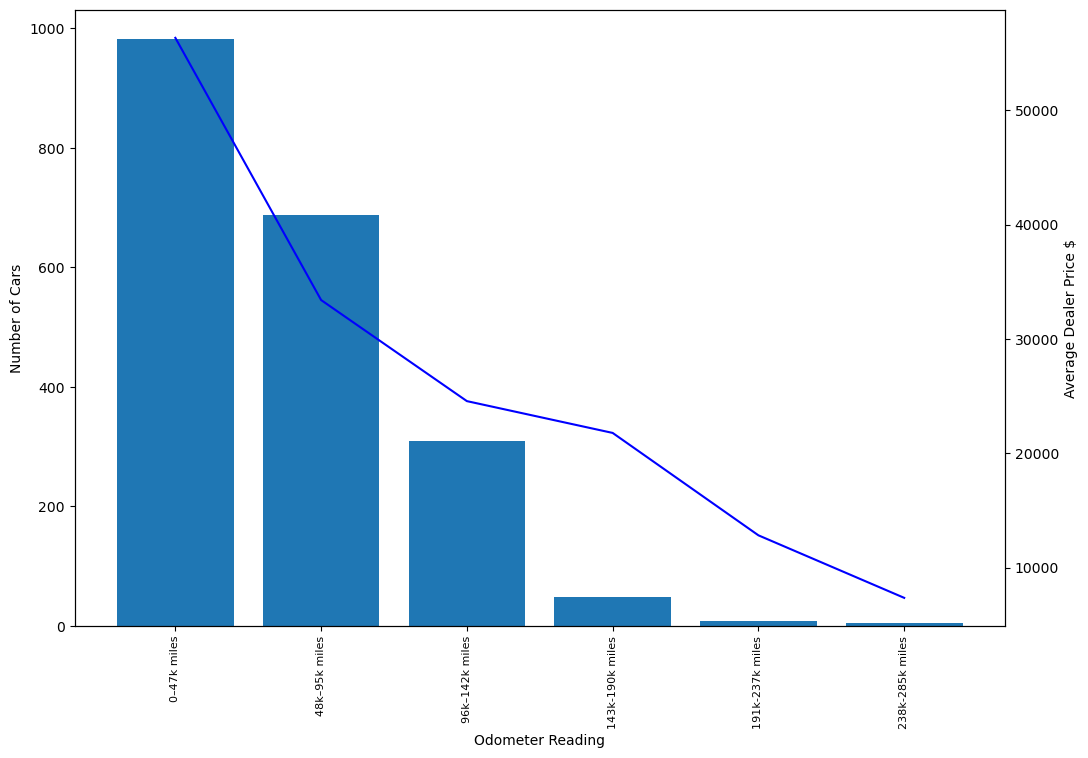

In [149]:
Dis_price = round(df.groupby("Odometer_cat").mean()["Dealer_Price"],2)
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(cat["Distnace"], cat["Reading"])
ax1.set_xlabel("Odometer Reading")
ax1.set_ylabel("Number of Cars")
ax2.plot(cat["Distnace"], Dis_price, "b-")
ax2.set_ylabel("Average Dealer Price $")
ax1.set_xticklabels(cat["Distnace"], rotation ="vertical", size = 8)
plt.show()

Observation:  Less-driven cars have higher prices compared to more-driven cars.


In [131]:
man_year = df["Year"].value_counts().reset_index().sort_values(by="index", ascending = False)[:15]
man_year = man_year.rename(columns={"index":"Year","Year":"Number"})

C:\Users\Dinesh_Saini\AppData\Local\Temp\ipykernel_23764\3000308269.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Year_price = round(df.groupby("Year").mean()["Dealer_Price"].reset_index().sort_values(by="Year", ascending=False)[:15], 2)


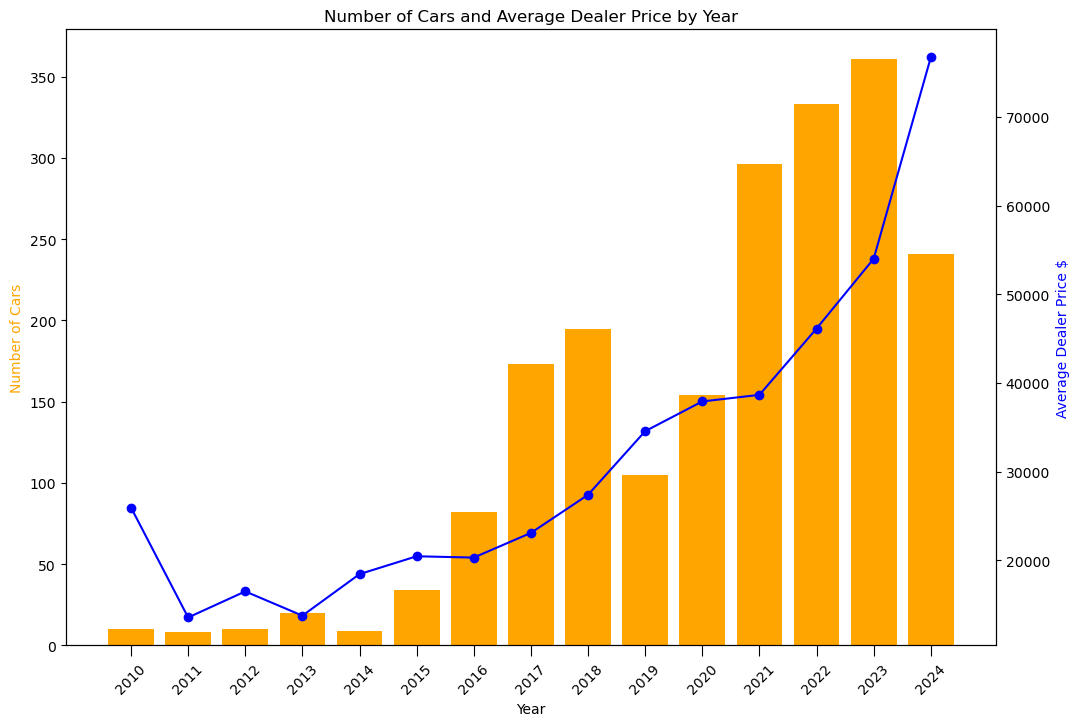

In [132]:
Year_price = round(df.groupby("Year").mean()["Dealer_Price"].reset_index().sort_values(by="Year", ascending=False)[:15], 2)
fig, ax1 = plt.subplots()

# Bar plot on primary axis
ax1.bar(man_year['Year'], man_year["Number"], color='orange')
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Cars", color='orange')

# Twin axes for line plot
ax2 = ax1.twinx()
ax2.plot(man_year['Year'], Year_price["Dealer_Price"], "b-", marker='o')
ax2.set_ylabel("Average Dealer Price $", color='blue')

# Setting x-ticks and labels
ax1.set_xticks(man_year['Year'])
ax1.tick_params(axis='x', rotation=45, size=8)

plt.title('Number of Cars and Average Dealer Price by Year')
plt.show()

Observation : The prices of the cars increase with the year means the latest year model cars are more expensive than any of the older year car.

In [133]:
model = df.groupby(["Brand","Year"]).agg("Model").count().reset_index().sort_values(by="Model", ascending= False)
model.head()

,Brand,Year,Model
112,Jeep,2023,70
65,Ford,2022,68
178,Ram,2022,61
37,Chevrolet,2023,56
71,GMC,2021,53


In [135]:
car_numerized = df.copy()

for col_name in car_numerized:
    if(car_numerized[col_name].dtype == 'object'):
        car_numerized[col_name] = car_numerized[col_name].astype("category")
        car_numerized[col_name] = car_numerized[col_name].cat.codes
car_numerized

,Car_Name,Odometer_reading,Dealer_Price,Year,Brand,Location,Model,Odometer_cat
0,209,85254,25799,2020,12,6,307,48k–95k miles
1,525,0,137100,2024,2,6,25,0–47k miles
2,491,0,173424,2024,5,6,81,0–47k miles
3,478,0,75100,2024,2,6,41,0–47k miles
4,526,0,62600,2024,2,6,40,0–47k miles
...,...,...,...,...,...,...,...,...
2035,412,20532,47998,2023,10,2,271,0–47k miles
2036,518,0,68990,2024,27,6,9,0–47k miles
2037,512,5105,31000,2024,24,6,244,0–47k miles
2038,68,154530,16855,2017,5,6,133,96k–142k miles


C:\Users\Dinesh_Saini\AppData\Local\Temp\ipykernel_23764\2702187314.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = car_numerized.corr(method = 'pearson')


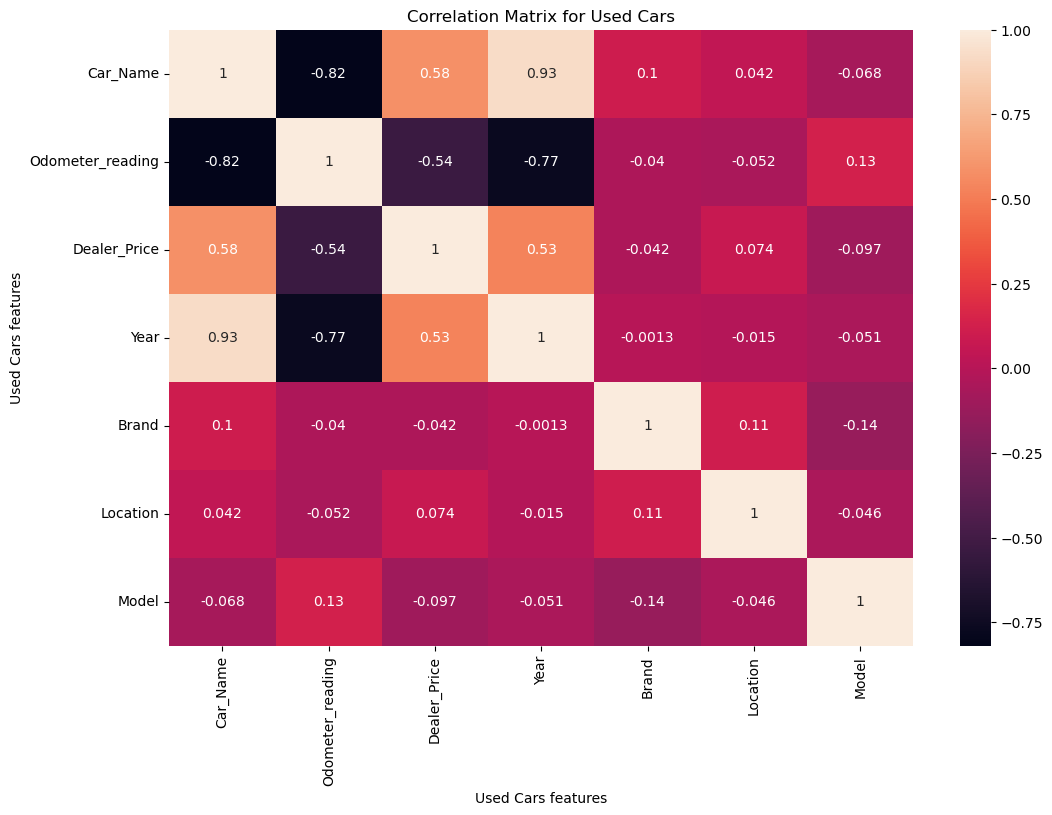

In [137]:
correlation_matrix = car_numerized.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation Matrix for Used Cars")
plt.xlabel("Used Cars features")
plt.ylabel("Used Cars features")
plt.show()

observation: The most significant correlation of price is with the odometer reading (-0.54) and with the car name (0.58), which is expected as cars with higher mileage are generally cheaper and certain brands or models possibly commanding higher prices.